In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from textwrap import wrap

# Model Training

In [34]:
# Train models with top 20 sets of hyperparameters
def retrieve_model(mod):
    files = []

    if (mod == "XGBoost"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/XGBoost/XGBoost'

    elif (mod == "LightGBM"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/LightGBM/LightGBM'

    elif (mod == "CatBoost"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/CatBoost/CatBoost'

    elif (mod == "NN"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/Neural Network/NeuralNetwork'

    elif (mod == "SVM"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/SVM/SVM'

    elif (mod == "DTree"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/Decision Tree/DTree'

    elif (mod == "RForest"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/Random Forest/RForest'

    elif (mod == "ElasticNet"):
        base_path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Models/ElasticNet/ElasticNet'


    else:
        print("Select one of the following models:")
        print("XGBoost")
        print("LightGBM")
        print("CatBoost")
        print("NN")
        print("SVM")
        print("DTree")
        print("ElasticNet")

    rmse_arr = []
    # Keep top 25 hyperparameter sets 
    n_params = 25

    for i in range(4):
        file_path = f"{base_path}_{i:02d}.xlsx"
        files.append(file_path)
        
    for i, file in enumerate(files):
        # Extract excel data to DataFrame
        trained_values = pd.read_excel(file)
        trained_values = pd.DataFrame(trained_values['value'])
        trained_values = trained_values.sort_values(by=['value'])
        trained_values = trained_values.reset_index(drop=True)
        trained_values = trained_values.drop(trained_values.index[n_params:])
        if i == 3:
            trained_values = np.power(10, trained_values)
        rmse_arr.append(trained_values['value'].tolist())

    return rmse_arr

In [35]:
rmse_scores = {}
model_list = ["XGBoost", "LightGBM", "CatBoost", "NN", "SVM", "DTree", "RForest", "ElasticNet"]
for i in range(len(model_list)):
    rmse_scores[model_list[i]] = retrieve_model(mod = model_list[i])

# Plot Figures - Individual

In [36]:
def plot_comparison(data_models, model_names, custom_ticks, output):
    # https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
    pad_size = 8
    txt_size = 20

    fig, ax1 = plt.subplots(figsize=(11, 6))
    fig.canvas.manager.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_models, notch=False, sym='+', vert=True, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')


    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                alpha=0.5)
    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
    )

    # Fill the boxes with desired colors
    box_colors = ['#4c72b0']
    num_boxes = len(rmse_scores)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[0]))
        ax1.set_xticklabels(model_names, rotation=45, fontsize=txt_size)

    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    # up_lim = upper_lim
    # low_lim = lower_lim
    # ax1.set_ylim(low_lim, up_lim)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    weights = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 2
        ax1.text(pos[tick], .92, upper_labels[tick],
                transform=ax1.get_xaxis_transform(),
                horizontalalignment='center', fontsize=18,
                weight=weights[k], color=box_colors[0])

    ax1.set_ylabel('RMSE', fontsize=txt_size+2, labelpad=13, weight='bold')
    ax1.tick_params(axis='both', labelsize=txt_size, width=1.5, length=8)

    ax1.set_ylim(custom_ticks[output][0], custom_ticks[output][-1])
    ax1.set_yticks(custom_ticks[output])

    plt.show()

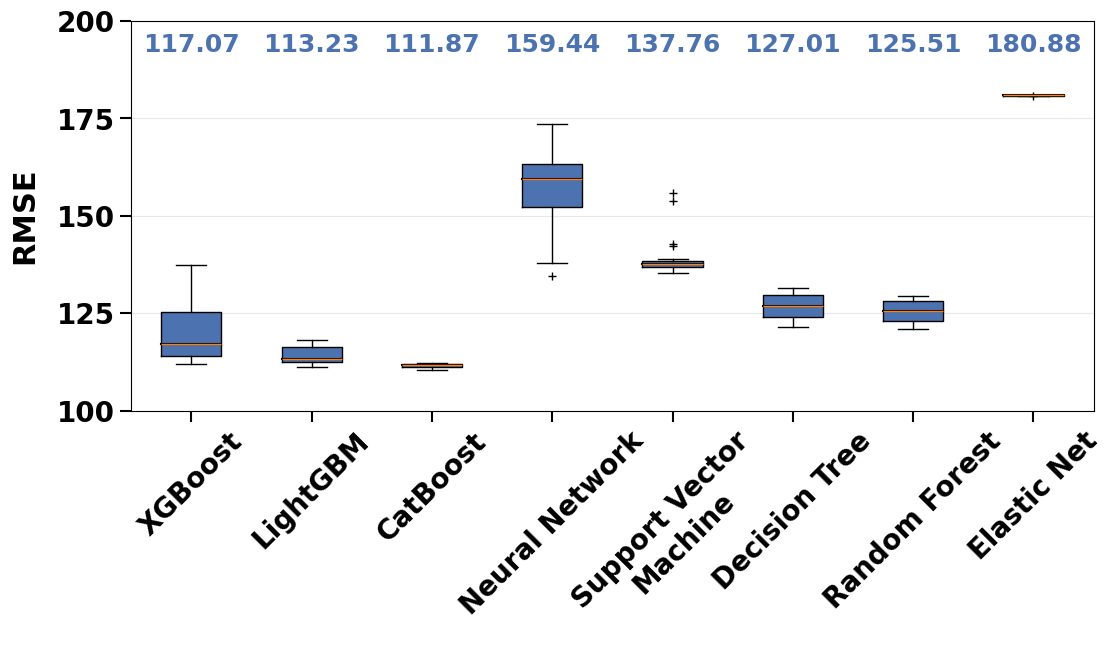

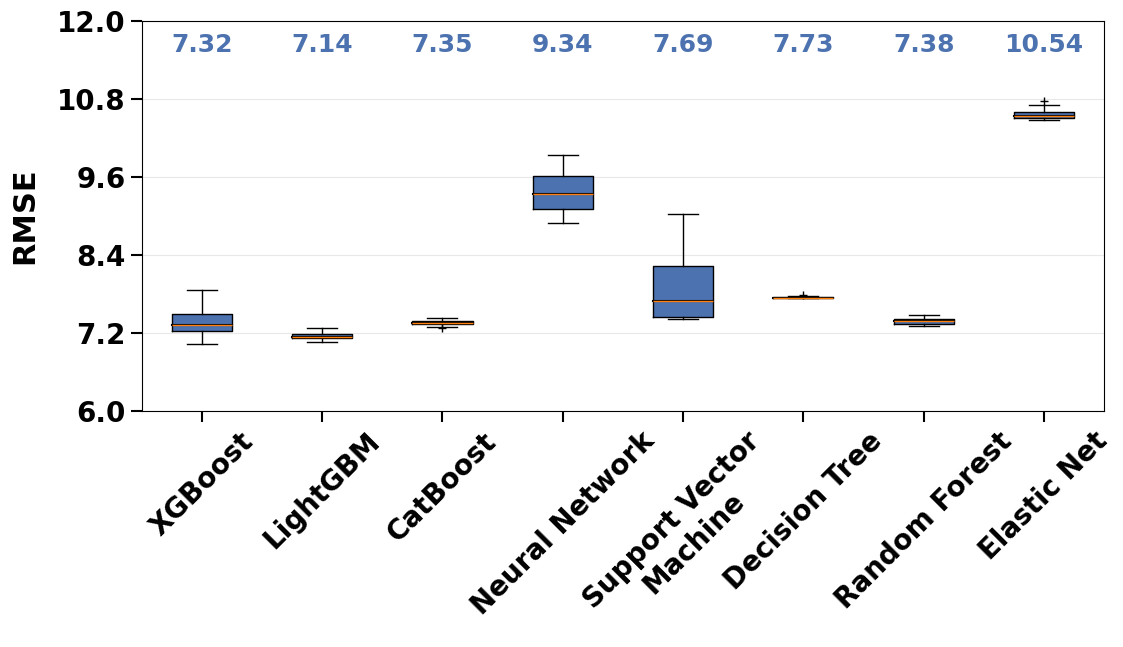

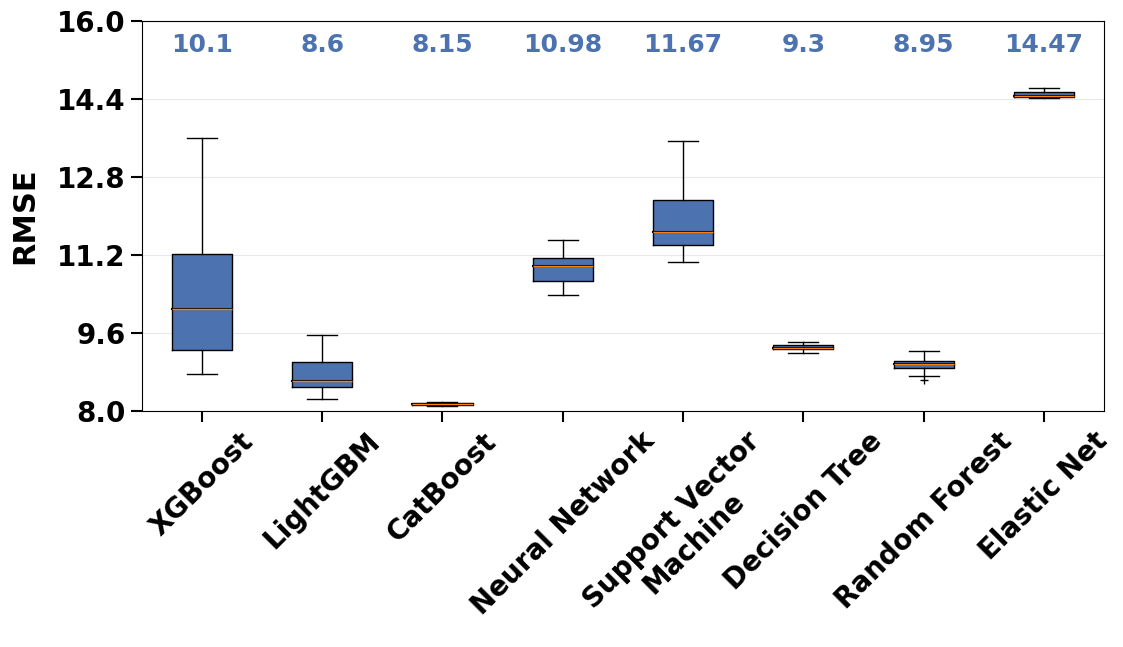

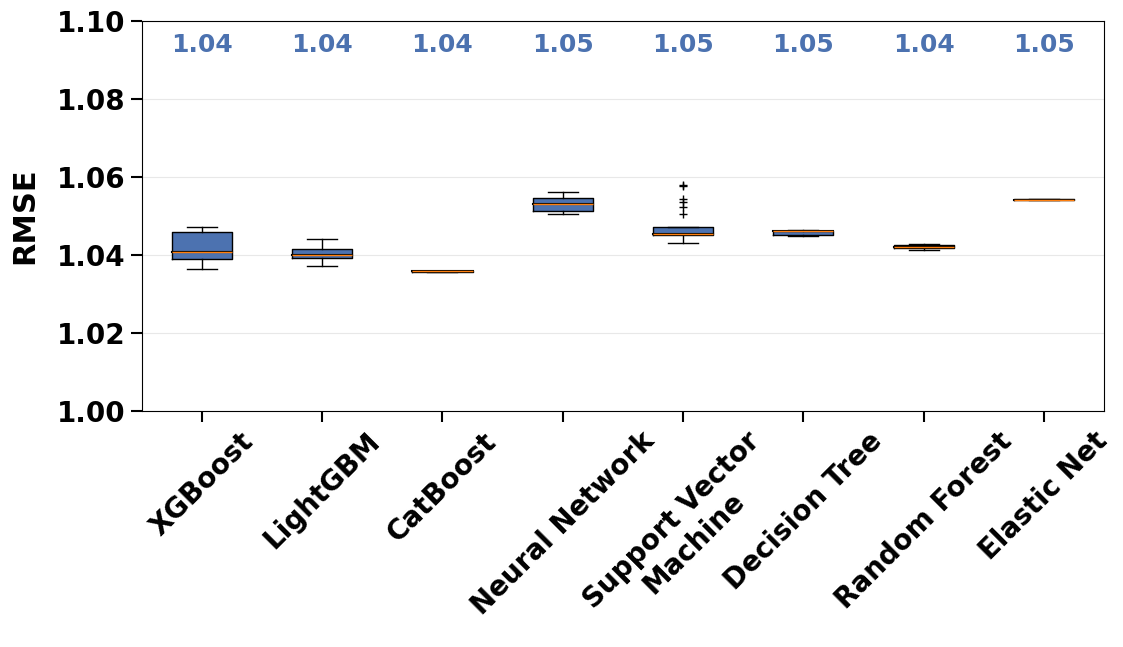

In [42]:
plt.rcParams["font.weight"] = "bold"
data_models = np.array(pd.DataFrame.from_dict(rmse_scores))
model_names = ['XGBoost', 'LightGBM', 'CatBoost', 'Neural Network', 'Support Vector Machine', 'Decision Tree', 'Random Forest', "Elastic Net"]
model_names = [ '\n'.join(wrap(l, 17)) for l in model_names]
upper_lim = [200, 10, 15, 0.15]
lower_limits = [100, 7, 8, 0.6]

custom_yticks = [
    np.linspace(100, 200, 5),  # Yield Stress (MPa)
    np.linspace(6, 12, 6),  # Average Work Hardening
    np.linspace(8, 16, 6),   # Elongation (%)
    np.linspace(1, 1.1, 6),  # Consolidation (%)
]

for n, models in enumerate(data_models):
    plot_comparison(models, model_names, custom_ticks=custom_yticks, output=n)

# Plot Figures - Averaged

In [43]:
mean_arr = {}
properties_list = ["Yield", "Hardening", "Elongation", "Consolidation"]
for i in range(len(model_list)):
    ys_rmse = np.mean(rmse_scores[model_list[i]][0])
    hardening_rmse = np.mean(rmse_scores[model_list[i]][1])
    elongation_rmse = np.mean(rmse_scores[model_list[i]][2])
    consolidation_rmse = np.mean(rmse_scores[model_list[i]][3])
    model_rmse = [ys_rmse, hardening_rmse, elongation_rmse, consolidation_rmse]
    mean_arr[f'{model_list[i]}'] = np.mean(model_rmse)

In [44]:
rmse_score_arr = {}
for model in model_list:
    rmse_score_arr[f'{model}'] = ((np.array(rmse_scores[model][0]) + np.array(rmse_scores[model][1]) + np.array(rmse_scores[model][2]) + np.array(rmse_scores[model][3])) / 4).tolist()

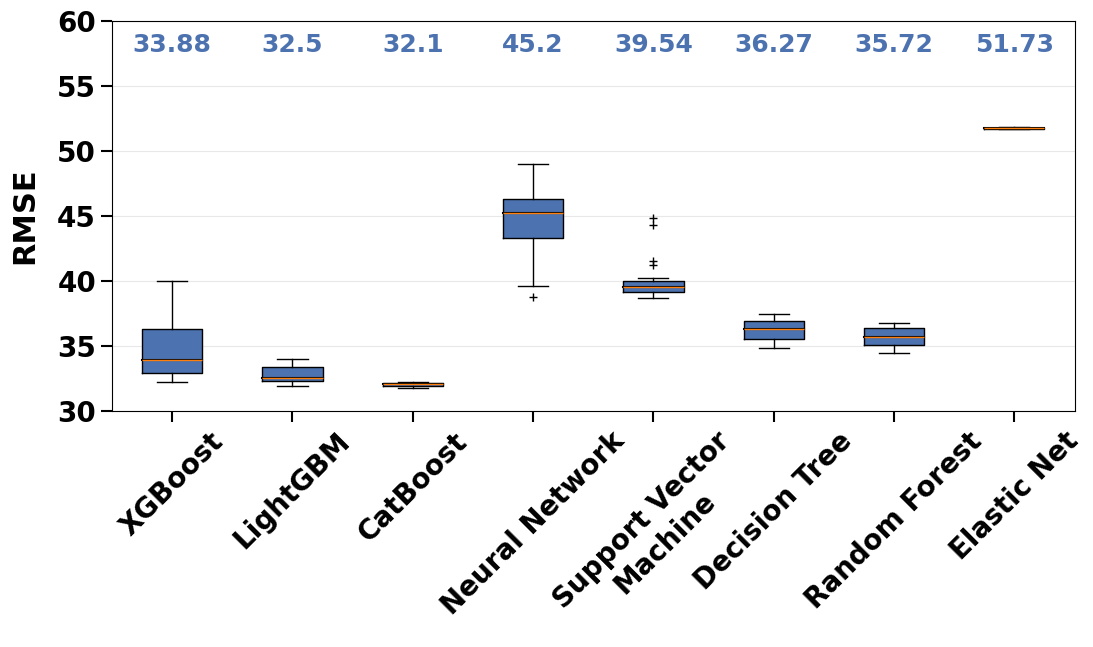

In [45]:
data_rmse = np.array(pd.DataFrame.from_dict(rmse_score_arr))
custom_yticks = [np.linspace(30, 60, 7)]

plot_comparison(data_rmse, model_names, custom_ticks=custom_yticks, output=0)